In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (8,6)
# to samo tylko dla tekstu
plt.rcParams['font.size'] = 16
# ustawia wielkość tekstów dla wykresów seaborn zależną od wielkości wykresu
sns.set_context('paper', font_scale=1.4)

# Po co my to w ogóle robimy?

'*The best single device for suggesting, and at times answering, questions beyon those originally posted is the graphical display*'

 John Tukey - tówrca Szybkiej Transformaty Fouriera i boxplotu

EDA służy po to by odpowiadać na pytania, ale także tworzyć nowe. W dużym projekcie jest to element do którego można wracać wielokrotnie na różnych etapach. Dobrym nawykiem jest wymyślenie pytania dotyczącego danych i próba odpowiedzenia na nie, właśnie poprzez wizualizacje czy zestawienia liczbowe

## Dane
Źródło **UCI Machine Learning Repository** [link](https://archive.ics.uci.edu/ml/datasets/wine+quality)

In [2]:
data = pd.read_csv("winequality-white.csv", sep=";")

### Szybkie spojrzenie na dane
Zalety metody `pd.DataFrame.info()` : 
- nazwy kolumn
- typy danych
- ilość braków
- rozmiar

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Zalety metody `pd.DataFrame.describe()` : 
- wielkości zmiennych
- mediana i średnia dają wgląd w skośnosć sugerują istnienie outlierów
- odchylenie standardowe

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Analiza typów zmiennych


### Zmienne jakościowe
 - binarne (dwie wartości) z reguły true/false
 - nominalne (nieuporządkowane) np. rasa psa
 - uporządkowane np. wykształcenie podstawowe -> średnie -> wyższe

### Zmienne ilościowe
 - zliczenia/porządkowe (liczba wystąpień pewnego zdarzenia, liczba całkowita) np. wiek osoby, odwiedziny na stronie
 - ilorazowe (skala, w której jest sens mówić o wielokrotnościach danej wielkości) np. długość w metrach
 - przedziałowe (mierzone w skali, w której można dodawać/odejmować wartości) np. data, ale też temperatura w stopniach Celsjusza


### Zmienne w danych

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

`fixed.acidity` : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

`volatile.acidity` : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

`citric.acid` : found in small quantities, citric acid can add ‘freshness’ and flavor to wines

`residual.sugar` : the amount of sugar remaining after fermentation stops.

`chlorides` : the amount of salt in the wine.

`free.sulfur.dioxide` : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.

`total.sulfur.dioxide` : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

`density` : the density of wine is close to that of water depending on the percent alcohol and sugar content

`pH` : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

`sulphates` : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

`alcohol` : the percent alcohol content of the wine.

`quality` : Dependent variable (based on sensory data, score between 0 and 10).0 signifies very bad quality and 10 signifies very good quality.

<AxesSubplot:xlabel='pH', ylabel='Count'>

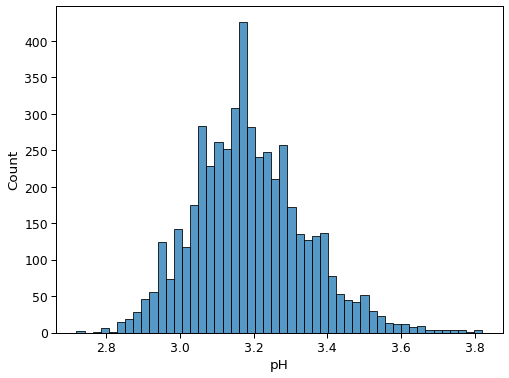

In [6]:
sns.histplot(data['pH'],bins = 50)

### Zmienna celu - `quality`
Liczbowa ocena jakości wina. Skoro jest to liczba to jest to zadanie regresji czy klasyfikcaji? 

In [7]:
data['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

## Brakujące dane
Jak chcemy sobie z nimi poradzić?

In [8]:
data_mod = data.copy()
np.random.seed(1)
missing = np.random.randint(5, size = (data.shape[0],3))//4

In [9]:
missing

array([[0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]], dtype=int32)

In [10]:
data_mod[['density','pH','sulphates']] = data_mod[['density','pH','sulphates']].where(missing==0)

In [11]:
data_mod.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,NaN,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,NaN,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,NaN,3.19,NaN,9.9,6


In [12]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               3928 non-null   float64
 8   pH                    3952 non-null   float64
 9   sulphates             3936 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Uzupełnianie braków nie jest cześcią eksploracji danych, ale informacja o ilości obserwacj z pełnymi informacjami już tak

In [13]:
data_clean_1 = data_mod.dropna()

In [14]:
data_clean_1.shape

(2530, 12)

In [15]:
data_mod.shape

(4898, 12)

#### Potencjalne rozwiązanie problemu
Uzupełnienie brakujących wartości medianą z danej kolumny

In [16]:
data_mod.median()

fixed acidity             6.8000
volatile acidity          0.2600
citric acid               0.3200
residual sugar            5.2000
chlorides                 0.0430
free sulfur dioxide      34.0000
total sulfur dioxide    134.0000
density                   0.9937
pH                        3.1800
sulphates                 0.4700
alcohol                  10.4000
quality                   6.0000
dtype: float64

In [17]:
data_clean_1 = data_mod.fillna(data_mod.median())

Lepszym rozwiązaniem będzie być użycie jednego z imputerów z [sklearn.impute](https://scikit-learn.org/stable/modules/impute.html#impute), które polecam przejrzeć i ewentualnie wykorzystać w projektach

## Rozkłady zmiennych

### Czemu w ogóle na nie patrzymy?

Przede wszystkim chcemy zrozumieć dane, ale w zależności od postacji rozkłądów, możemy się zdecydować na różne przekształcenia, a nawet wybór konkretnych modeli.

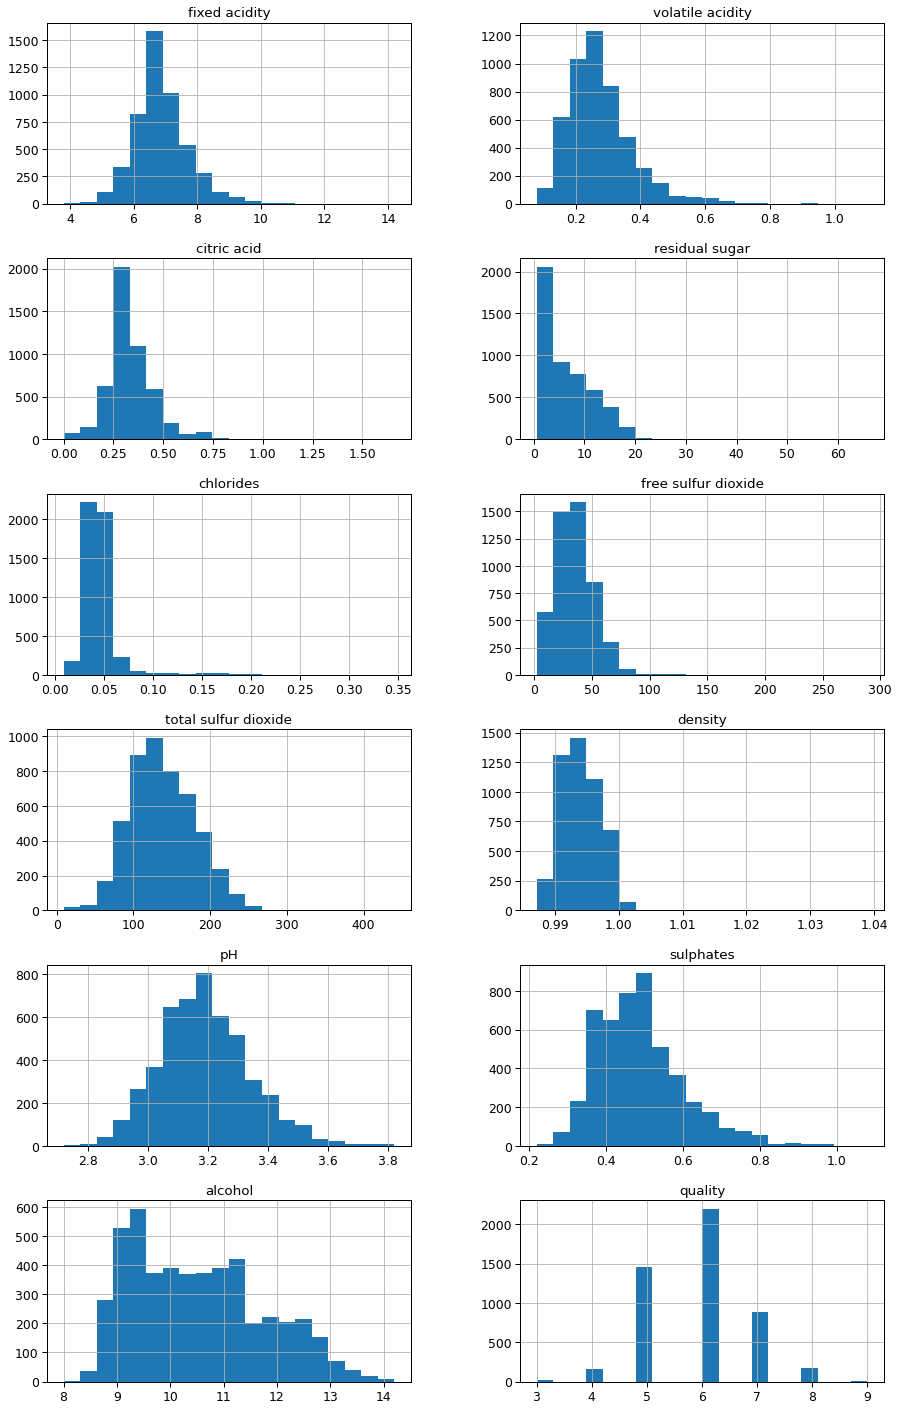

In [18]:
data.hist(bins = 20, figsize = (15,25), layout=(6,2))
plt.show()

## Wartości odstające (outliers)
Problematyczne ponieważ:
- często zakałdamy, że nasze dane pochodzą z konkretnego rozkładu, a wartości odstające to wartośći, które nie spełniają tego założenia
- znacznie wpływają na średnią (mogą powodować problemy przy centrowaniu)
- mogą uniemożliwić modelowi dobre dopasowanie się

Istnieje wiele metod detekcji obserwacji wartości odstajacych (np. Odległość Cook'a, MSO pozdrawia :) )

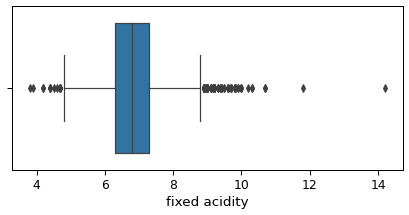

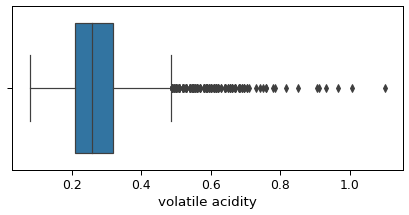

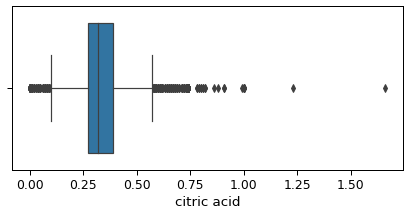

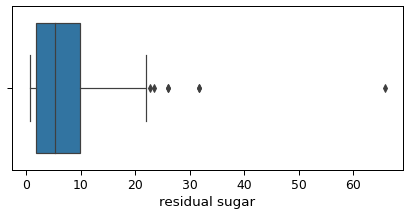

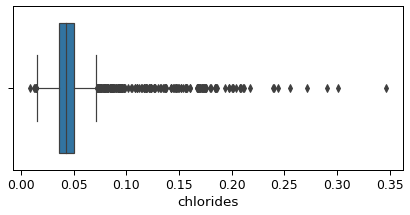

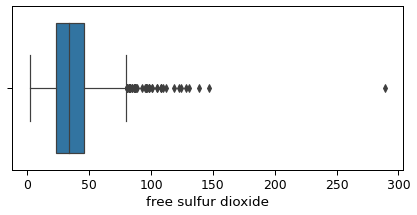

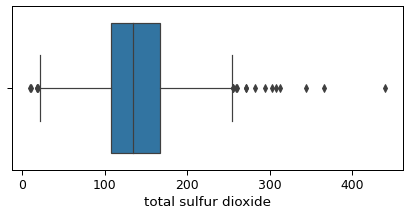

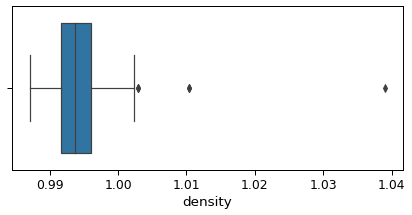

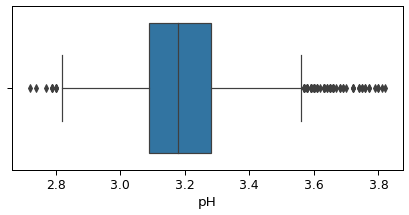

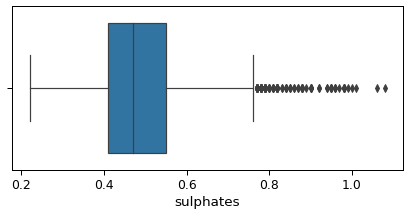

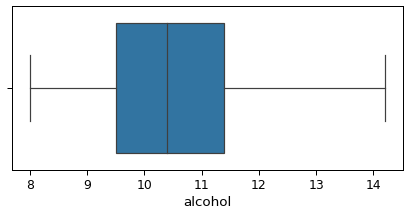

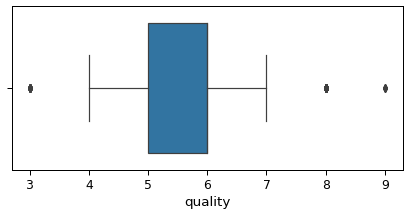

In [19]:
for col in data.columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=data, x = col)
    plt.show()

### Jeszcze raz kolumna celu

Źródło podaje, że ocena jest z przedziału [0,10], natomiast by mamy oceny tylo z przedziału [3,9]. 
Dodatkowo ilość obserwacji dla każdej z kategorii jest różna

In [20]:
data['quality'].sort_values().unique()

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

[]

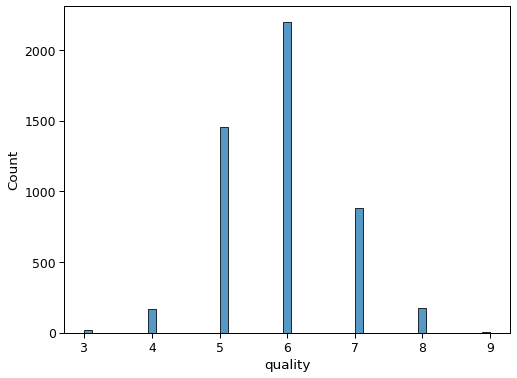

In [21]:
sns.histplot(data['quality'])
plt.plot()

## Macierz korelacji

Jedna z prostrzych metod zobrazowania zależności między zmiennymi. Interesują nas zarówno zmienne, które mają bardzo wysoką (w sensie wartości absolutnych) korelacje oraz te, które mają bardzo małą korelacje z zmienną celu.

<AxesSubplot:>

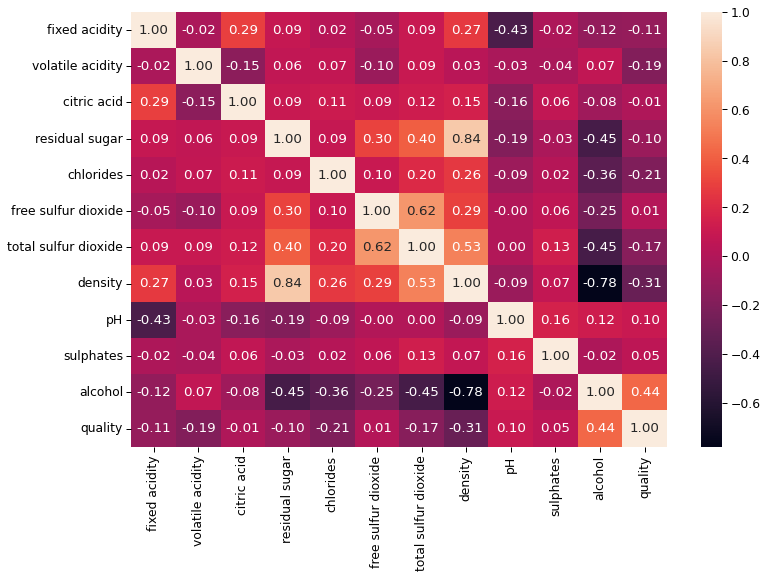

In [22]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

### Badanie korelacji zmiennych

0.00 - brak korelacji

<AxesSubplot:xlabel='pH', ylabel='free sulfur dioxide'>

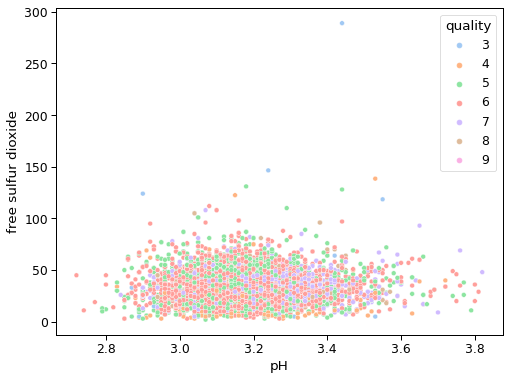

In [23]:
sns.scatterplot(data=data, x = "pH", y = "free sulfur dioxide", hue="quality", palette="pastel")

0.62 - widoczna zależność

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

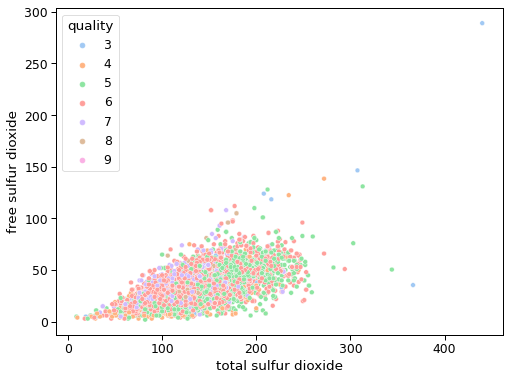

In [24]:
sns.scatterplot(data=data, x = "total sulfur dioxide", y = "free sulfur dioxide", hue="quality", palette="pastel")

0.84 - bardzo silna dodatnia zależność

<AxesSubplot:xlabel='density', ylabel='residual sugar'>

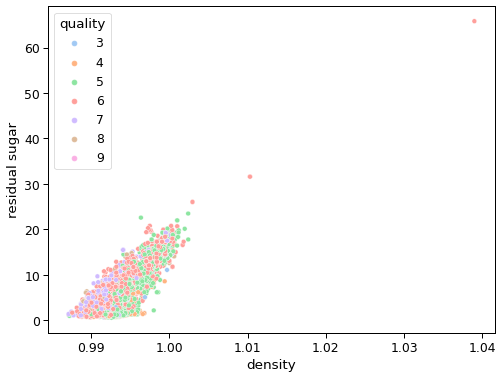

In [25]:
sns.scatterplot(data=data, x = "density", y = "residual sugar", hue="quality", palette="pastel")

-0.78 - silna ujemna zależność

<AxesSubplot:xlabel='alcohol', ylabel='density'>

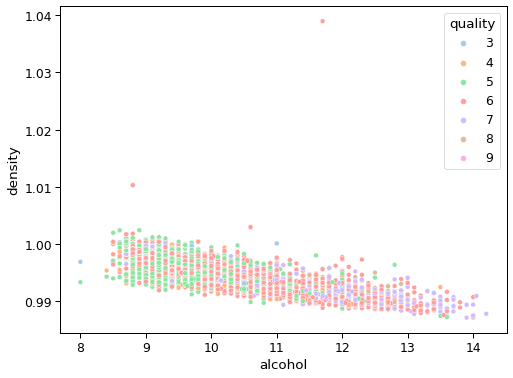

In [26]:
sns.scatterplot(data=data, x = "alcohol", y = "density", hue="quality", palette="pastel",)

### Co jeszcze można robić przy eksploracji danych?
 - przekształcenia wartości kolumn przez funkcje (log, sqrt, x^2)
 - redukcja wymiarowości danych
 - dodatkowe wykresy zależności poszczególnych zmiennych 
 - kodowanie zmiennych kategorycznych (na cele eksploracji ,[przykłady](https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9))

## Co dalej?  Następne laboratoria

### Inżynieria cech

### Modelowanie

### Weryfikacja